# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №3: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 5 ноября 2019, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 5 ноября, -4 балла после 06:00 12 ноября, -6 баллов после 06:00 19 ноября  -8 баллов после 06:00 26 ноября.

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

***Ваше решение здесь***

Градиент для линейной регрессии с $L_2$-регуляризацией для мини-батч шрадиентного спуска размера $n$:
\
Сначала выпишем формулу для $n=N$:
\
$$L(w) = {{1}\over{N}}\cdot (\sum_i(y_i-a_i)^2) + {{1}\over{C}}\cdot R(w)  =$$

$$ = {{1}\over{N}}\cdot (\sum_i(y_i-a_i)^2) + {{1}\over{C}}\cdot (\sum_j^D w_j^2) = $$

$$ = {{1}\over{N}}\cdot (X\cdot w - y)^T\cdot(X\cdot w - y) + {{1}\over{C}}\cdot w^T\cdot w $$

$$ grad L(w) = {{1}\over{N}}\cdot(2X^T\cdot X\cdot w - 2X^T\cdot y) + {{1}\over{C}}\cdot 2w$$

$$ w_{new} = w_{old} - \alpha \cdot grad L(w_{old}, X, y)$$



При $n<N$ используем выборку $\{j_1, j_2,...,j_n\} \subset \{1,2,...,N\}$. Введем вектор $X_{batch}$ и вектор $y_{batch}$, $i$-тые компоненты которых равны соответсвующим $i$-тым компонентам $X$ и $y$, если $i \in \{j_1, j_2,...,j_n\}$, иначе - равны 0. Также формула обновления весов принимает вид:

$$ w_{new} = w_{old} - \alpha \cdot \Bigr(
{{1}\over{n}}\cdot(2X_{batch}^T\cdot X_{batch}\cdot w - 2X_{batch}^T\cdot y_{batch}) + {{1}\over{C}}\cdot 2w \Bigr)
$$



Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:

$$ w_{new} = w_{old} - ... $$

 Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

***Ваше решение здесь***

Градиент для логистической регрессии с $L_2$-регуляризацией для мини-батч шрадиентного спуска размера $n$:
\
Сначала выпишем формулу для $n=N$:
\
$$L = {{1}\over{N}}\cdot \big(\sum_i y_i \cdot log(a_i) + (1-y_i)\cdot log(1-a_i) \big) + {{1}\over{C}}\cdot R(w)  =$$

$$ = {{1}\over{N}}\cdot \big(\sum_i y_i \cdot log(a_i) + (1-y_i)\cdot log(1-a_i) \big) + {{1}\over{C}}\cdot (\sum_j^D w_j^2) = $$

$$ = {{1}\over{N}}\cdot \big(\sum_i y_i \cdot log(a_i) + (1-y_i)\cdot log(1-a_i) \big) + {{1}\over{C}}\cdot w^T\cdot w $$

$${{d}\over{da}}L = -{{1}\over{N}} \cdot \Bigr( {{y}\over{a}} - {{1-y}\over{1-a}} \Bigr)=$$

$$ = {{1}\over{N}} \cdot \Bigr( {{a-y}\over{a \cdot (1-a)}}\Bigr)=$$

$$ = {{1}\over{N}} \cdot \Bigr( {{a-y}\over{{{exp(-(x,w))}\over{1 + exp((x,w))}}}}\Bigr)$$

$$a(x,w) = \sigma((x,w)) = {{1}\over{1 + exp(-(x,w))}}$$

$${{d}\over{dw}}a(x,w) = {{x \cdot exp(-(x,w))}\over{1 + exp((x,w))}}$$

$${{d}\over{dw}}L = {{{d}\over{da}}L}\cdot{{{d}\over{dw}}a} = {{1}\over{N}} \cdot X^T\cdot(a-y) + {{2}\over{C}}w$$.

$$ w_{new} = w_{old} - \alpha \cdot {{d}\over{dw}} L(w_{old}, X, y)$$

\
При $n<N$ используем выборку $\{j_1, j_2,...,j_n\} \subset \{1,2,...,N\}$. Введем вектор $X_{batch}$ и вектор $y_{batch}$, $i$-тые компоненты которых равны соответсвующим $i$-тым компонентам $X$ и $y$, если $i \in \{j_1, j_2,...,j_n\}$, иначе - равны 0. Тогда формула обновления весов принимает вид:

$$ w_{new} = w_{old} - \alpha \cdot {{1}\over{n}}\cdot X_{batch}^T\cdot(a(X_{batch},w)-y_{batch}) + {{2}\over{C}}w$$


Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

***Ваше решение здесь***

Точное решение для линейной регрессии было получено из условия первого порядка для минимизации функционала 
$$ L(w)= {{1}\over{N}}\cdot (X\cdot w - y)^T\cdot(X\cdot w - y) $$
Оно выглядит следующим образом:
$$ {{d}\over{dw}}L(w) =  {{1}\over{N}}\cdot \Bigr( 2\cdot X^T \cdot X \cdot w - 2 \cdot X^T \cdot y \Bigr) =0$$

Чтобы показать, что это действительно минимим, посчитаем вторую производную:

$${{d^2}\over{{dw}^2}}L(w) = 2 \cdot X^T \cdot X$$

А матрица $X^T\cdot X$ является положительно определенной. Значит наше решение - минимум.

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

***Ваше решение здесь***



Мы рассматриваем задачу классификации с двумя классами,
целевая переменная принимает только 2 значения, 
значит можем рассмотреть для нее распределение Бернулли.
Для распределения Бернулли верна формула:  $ {{p_+}\over{p_-}}  = {{p_+}\over{1-p_+}} = exp((w,x))$
\
Отсюда выразим $p_+$:
$$p_+ = {{exp((x,w))}\over{1+exp((x,w))}} = $$
\
$$ {{exp((x,w))/exp((x,w))}\over{(1+exp((x,w)))/exp((x,w))}} = $$
\
$$ {{1}\over{exp(-(x,w))+1}} $$


Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

***Ваше решение здесь***

Свободный член $w_0$ не используется в регуляризации $L_1/L_2$, так как он выступает в роди некоторого среднего ("тренда"),
вокруг которого мы "колеблемся" с помощью остальных весов. И если регулирование других весов логично, то штрафовать модель за 
ее среднее (которое зависит от задачи) - глупо, ведь так мы будем только отдаляться от правильного решения.

#  Реализация линейной модели (5 баллов)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    

    ind = np.arange(y.shape[0]);
    if shuffle:
        ind = np.random.permutation(ind)
    for i in range(y.shape[0]):
        if ((i+1)*batch_size < y.shape[0]):
            index = ind[i*batch_size:(i+1)*batch_size]
            X_batch = X[index]
            y_batch = y[index]
            yield (X_batch, y_batch)

# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
#%%pycodestyle
# изначальный алгоритм с неправильным батчем
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1/(1+np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.weights = None
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        y = np.array(y_batch)
        if self.model_type == 'lin_reg':
            a = np.matmul(X_batch, self.weights)
            loss = np.dot((a-y),(a-y))/X_batch.shape[0] + np.dot(self.weights,self.weights)/self.C
        if self.model_type == 'log_reg': 
            a = sigmoid(np.matmul(X_batch,self.weights))
            loss = -np.sum(y*np.log(a) + (1-y)*np.log(1-a))/X_batch.shape[0] + np.dot(self.weights,self.weights)/self.C
        
        loss -= - (self.weights[0]**2)/self.C
        return loss
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        y = np.array(y_batch)
        
        if self.model_type == 'lin_reg':
            loss_grad = 2*(np.matmul((np.matmul(X_batch.T, X_batch)), self.weights))/X_batch.shape[0] + self.weights*2/self.C
        if self.model_type == 'log_reg': 
            a=sigmoid(np.matmul(X_batch,self.weights))
            loss_grad = np.dot( X_batch.T, a-y)/X_batch.shape[0] +2*self.weights/self.C
        
        loss_grad[0] -= self.weights[0]*2/self.C
        return loss_grad
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights = self.weights - new_grad*self.alpha
    
    def fit(self, X, y, steps = 5, batch_size = 1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        '''
        # Нужно инициализровать случайно веса
        # добавление единиц (x_0)
        total_loss = 0
        step = 0
        XX = np.hstack((np.ones((X.shape[0], 1)), X)) 
        self.weights = np.ones(XX.shape[1], dtype=float)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(XX,y,batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                # Подумайте в каком месте стоит посчитать ошибку для отладки модели
                # До градиентного шага или после
                # КОНЕЧНО, ПОСЛЕ (нас же интересуют новые данные, а не те, которые алгоритм уже видел)
                batch_loss = self.calc_loss(X_batch, y_batch)
                total_loss += batch_loss
                step +=1
                if step==steps:
                    self.errors_log['loss'].append(total_loss/steps)
                    total_loss = 0
                    step = 0
                self.errors_log['iter'].append(batch_num)
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        XX = np.hstack((np.ones((X.shape[0], 1)), X))
        if self.model_type == 'lin_reg':
            y_hat = np.matmul(XX,self.weights)
        if self.model_type == 'log_reg':      
            y_hat = sigmoid(np.dot(XX, self.weights))
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    ## Your code Here
    X = np.array([-2, 8])
    Y = -(clf.weights[0] + clf.weights[1]*X) / clf.weights[2]
    plt.plot(X, Y)

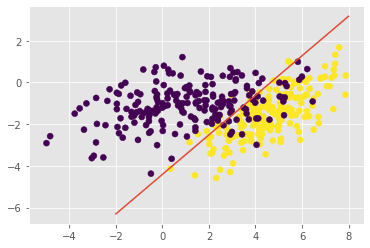

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)

model = MySGDClassifier(batch_generator=batch_generator, C=100, max_epoch=100, model_type='log_reg')
model.fit(X, y)
plot_decision_boundary(model)

plt.scatter(X[:,0], X[:,1], c=y)

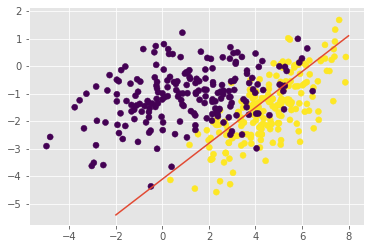

In [10]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 
                                                    3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)

model = MySGDClassifier(batch_generator=batch_generator, C=1, max_epoch=100, model_type='lin_reg')
model.fit(X, y)
plot_decision_boundary(model)

plt.scatter(X[:,0], X[:,1], c=y)

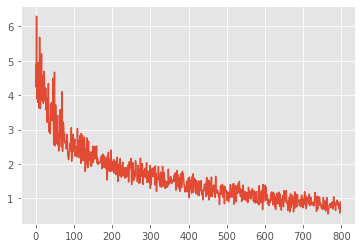

In [11]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)

model = MySGDClassifier(batch_generator=batch_generator, C=1, max_epoch=10, model_type='log_reg', alpha = 0.001)
model.fit(X, y)
plt.plot (model.errors_log['loss'])

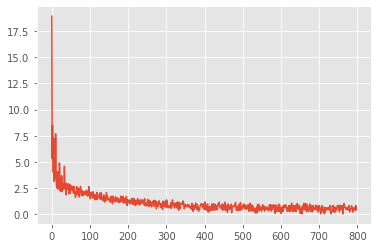

In [12]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

# plot_decision_boundary(your_model)

model = MySGDClassifier(batch_generator=batch_generator, C=1, max_epoch=10, model_type='lin_reg', alpha = 0.001)
model.fit(X, y)
plt.plot (model.errors_log['loss'])

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [13]:
from sklearn.datasets import make_classification

In [14]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

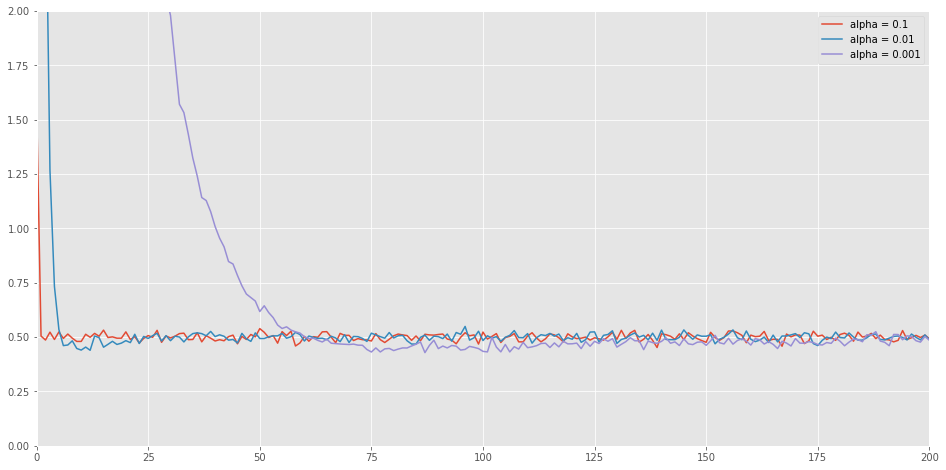

In [15]:
N = 10
plt.figure(figsize=(16, 8))
alphas = [0.1, 0.01, 0.001]
for i in range(3):
    model = MySGDClassifier(batch_generator, alpha=alphas[i], C=1, model_type='lin_reg', max_epoch=10)
    model.fit(X, y, steps=N, batch_size = 100)
    plt.plot(model.errors_log['loss'], label=f'alpha = {alphas[i]}')
plt.axis([0,200,0,2])
plt.legend()
plt.show()

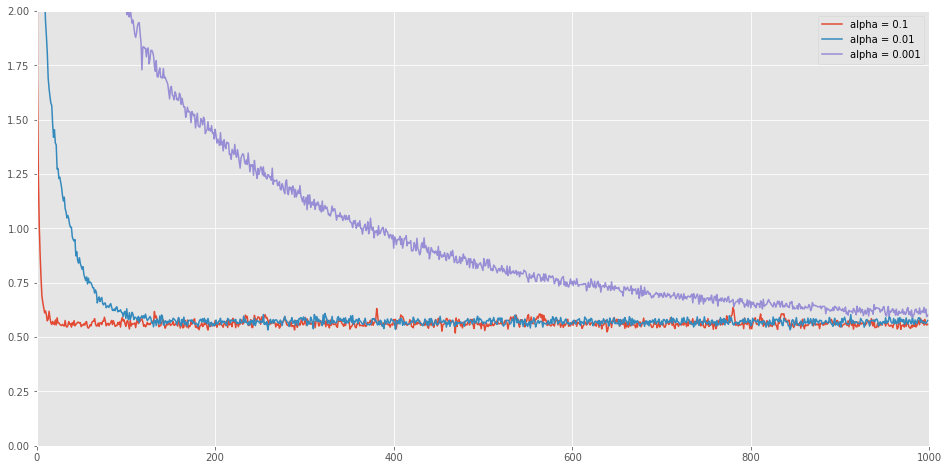

In [16]:
N = 10
plt.figure(figsize=(16, 8))
alphas = [0.1, 0.01, 0.001]
for i in range(3):
    model = MySGDClassifier(batch_generator, alpha=alphas[i], C=1, model_type='log_reg', max_epoch=1)
    model.fit(X, y, steps=N, batch_size = 10)
    plt.plot(model.errors_log['loss'], label=f'alpha = {alphas[i]}')
plt.axis([0,1000,0,2])
plt.legend()
plt.show()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

Посмотрим на графики для логистической регрессии. Нельзя выбирать $\alpha$ слишком большим, так мы можем "перескочить" оптимальные значения весов, и дальше мы будем колебаться "шире" около оптимальных значений (у красного скачки больше). Но выбирать очень маленьким тоже нельзя, так будем очень долго сходиться к оптимальному значению (сиреневый дольше приближается к оптимальному значению, чем красный и синий). Лучше выбрать $\alpha = 0.01$.

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:44: RuntimeWarning: overflow encountered in double_scalars
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in multiply
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:43: RuntimeWarning: invalid value encountered in matmul
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: overflow encountered in true_divide
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:75: RuntimeWarning: invalid value encountered in subtract
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel

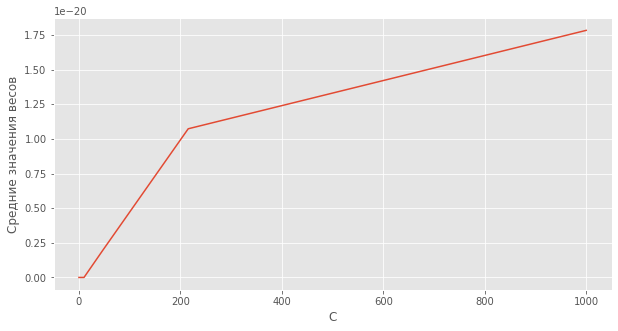

In [17]:
## Your Code Here
plt.figure(figsize=(10, 5))
coefs = np.logspace(3, -3, 10)
weights_mean = np.zeros(coefs.shape)

for i, C in enumerate(coefs):
    model = MySGDClassifier(batch_generator, C=C, model_type = 'lin_reg')
    model.fit(X, y, steps=100, batch_size = 100)
    weights_mean[i] = model.weights.mean()
    
plt.plot(coefs, weights_mean)
plt.xlabel('C')
plt.ylabel('Средние значения весов')
plt.show()

/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in exp
  
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: overflow encountered in double_scalars
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:65: RuntimeWarning: overflow encountered in true_divide
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:46: RuntimeWarning: invalid value encountered in matmul
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launche

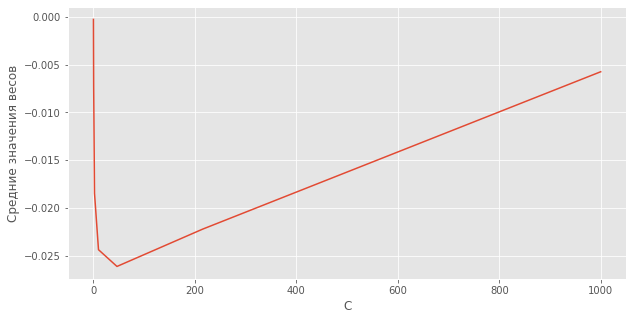

In [18]:
## Your Code Here
plt.figure(figsize=(10, 5))
coefs = np.logspace(3, -3, 10)
weights_mean = np.zeros(coefs.shape)

for i, C in enumerate(coefs):
    model = MySGDClassifier(batch_generator, C=C, model_type = 'log_reg')
    model.fit(X, y, steps=100, batch_size = 100)
    weights_mean[i] = model.weights.mean()
    
plt.plot(coefs, weights_mean)
plt.xlabel('C')
plt.ylabel('Средние значения весов')
plt.show()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

# Боевое применение (3  балла)

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [19]:
import pandas as pd
title_data = pd.read_csv('docs_titles.tsv', sep='\t', encoding='utf-8', lineterminator='\n')
title_data.head()

,doc_id,title
0,15731,ВАЗ 21213 | Замена подшипников ступицы | Нива
1,14829,"Ваз 2107 оптом в Сочи. Сравнить цены, купить п..."
2,15764,Купить ступица Лада калина2. Трансмиссия - пер...
3,17669,Классика 21010 - 21074
4,14852,Ступица Нива — замена подшипника своими руками


In [20]:
doc_to_title = {}
with open('docs_titles.tsv') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))


28026


In [21]:
import pandas as pd
train_data = pd.read_csv('train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [22]:
import numpy as np
y_train = []
X_train = []
groups_train = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y_train.append(target_id)
        groups_train.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_train.append(sorted(all_dist, reverse=True)[0:15]    )
X_train = np.array(X_train)
y_train = np.array(y_train)
groups_train = np.array(groups_train)
print (X_train.shape, y_train.shape, groups_train.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [23]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from itertools import product

In [24]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

batch_sizes = [1, 10, 100, 500, 1000]
for batch_size in batch_sizes:
    model = MySGDClassifier(batch_generator, model_type="lin_reg",)
    model.fit(X_train, y_train, batch_size=batch_size)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [25]:
def cross_val_score(model, kf, X, y, batch_size):
    score = []
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        model.fit(X_train, y_train,batch_size=batch_size)
        y_pred = model.predict(X_test)
        score.append(roc_auc_score(y_test, y_pred))
    return np.mean(score)

arg = product((1, 10, 100), (0.1, 0.01, 0.001), (1,2), ("lin_reg", "log_reg"))
max = 0
for C, alpha, max_epoch, model_type in list(arg):
    model = MySGDClassifier(batch_generator, model_type=model_type, max_epoch=max_epoch, C=C, alpha=alpha)
    score = np.mean(cross_val_score(model=model, kf=KFold(n_splits=3), X=X_train, y=y_train, batch_size=10))
    if score > max:
        max = score
        opt_model = model

/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: overflow encountered in double_scalars
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_la

In [26]:
print(opt_model)

MySGDClassifier(C=100, alpha=0.1,
                batch_generator=<function batch_generator at 0x7fdc9d2493b0>,
                max_epoch=2, model_type='log_reg')


Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании (f).  Как тогда правильно подобрать порог?

In [27]:
def cross_val_score(model, kf, X, y, th):
    scores = []
    for train_index, test_index in kf.split(X):
        X_train = X[train_index]
        X_test = X[test_index]
        y_train = y[train_index]
        y_test = y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        scores.append(f1_score(y_test, y_pred > th))
    return np.mean(scores)

In [29]:
max = 0
for tmp in np.linspace(0.3, 0.7, 40):
    score = cross_val_score(model=opt_model,kf=KFold(n_splits=3),X=X_train,y=y_train,th=tmp)
    if score > max:
        max = score
        opt_th = tmp

/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: divide by zero encountered in log
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/ipykernel_launcher.py:47: RuntimeWarning: invalid value encountered in multiply
/home/linuxconfig/miniconda3/envs/sphere-py37/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
print (opt_th)

0.36153846153846153


С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук прислать Ваш ник на kaggle, под которым Вы залили решение, которое побило первый бейзлайн. **

In [31]:
test_data = pd.read_csv('test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))

In [32]:
y_test = []
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15]    )
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [33]:
X_test = scaler.transform(X_test)
y_test = np.asarray(opt_model.predict(X_test)>opt_th, dtype=int)
test_data["target"] = pd.Series(y_test)
with open("file.csv", "w") as f:
    f.write(test_data.to_csv(columns=("pair_id", "target"), index=False))

# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

Спасибо большое преподавателям за отзывчивость на лекциях и в слаке!

Теория кажется понятной, после лекций может остаться какой-то вопрос, но ответ легко находится в дополнительных источниках. 
С практической частью очень сложно, потому что тут нужны и знания с лекций, и навыки работы с питоном. И часто совместить одно с другим не получается. Не хватает чисто практических лекций, чтобы разобрать какое-нибудь похожее задание основательно. Желательно, медленно, чтобы можно было вглядеться в код, потому что когда это листается быстро, многое приходится принимать "на веру", а потом очень тяжело с дз.

Иногда слайды лекций кажутся очень непонятными, не хваатает комментариев (конечно, есть устные на занятии, но иногда хочется подольше посомтреть на один слайд, а другой уже прослушал).


*** ВАШ ОТЗЫВ ЗДЕСЬ***